* Lets manually calculate the center of clusters and find the clusters

In [34]:
from sklearn import datasets
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np


def kume_merkezlerini_yeniden_hesapla(refler, noktalar, kumeler):  # recalculate the cluster centers
    for k in range(refler.shape[0]):
        refler[k] = noktalar[kumeler==k].mean(axis=0)

    return refler

def noktalari_kumelere_ata(noktalar, merkezler):  # apply points to clusters
    c=((noktalar[:, None, :] - merkezler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    return c

#calculate the all points distance to their cluster centers
def noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, merkezler, kumeler):  
    wcs = 0
    for k in range(merkezler.shape[0]):
        wcs += ((noktalar[kumeler==k] - merkezler[k])**2).sum()
    return wcs

@interact(iters=(0,40,1), seed=(0,100,1), kmeans=(2,10,1), dseed=(0,100,1))
def kviz(iters=0, seed=0, kmeans=5, dseed=40):
    wcss = []
    X, bilmiyoruz = datasets.make_blobs(random_state=dseed, centers=kmeans, n_samples=200)  #make dataset
    np.random.seed(seed)
    inds = list(range(X.shape[0]))
    noks = np.random.choice(inds, size=kmeans, replace=False)  # number of clusters
    noktalar = X
    refler = noktalar[noks]
    c=((noktalar[:, None, :] - refler[None, :, :])**2).sum(axis=2).argmin(axis=1)
    plt.figure(figsize=(12, 8))
    plt.title("t=0: Cluster centers are randomly assigned")

    for _ in range(iters):
        if _ % 2 == 0:
            plt.title(f"t={_+1}: Step: Maximization (Cluster centers re-calculated)")
            refler = kume_merkezlerini_yeniden_hesapla(refler, noktalar, c)
        else:
            plt.title(f"t={_+1}: Step: Expectation (Samples re-assigned to clusters)")
            c = noktalari_kumelere_ata(noktalar, refler)
        wcs = noktalarin_kendi_merkezlerine_uzakliklarini_hesapla(noktalar, refler, c)
        wcss.append(wcs)
    plt.scatter(*noktalar.T, c=c, cmap='rainbow')
    plt.scatter(*refler.T, s=400, edgecolors='k', marker='*', c=range(kmeans), cmap='rainbow')
    # plt.grid()
    plt.figure(figsize=(12, 4))
    plt.plot(range(iters), wcss, marker='o')
    plt.title("Sum of squared distances to cluster centers")
   # plt.grid()
    plt.xlabel("Iterations")
    plt.ylabel("WCSS")

interactive(children=(IntSlider(value=0, description='iters', max=40), IntSlider(value=0, description='seed'),…

In [33]:
#seed=48 dseed=40 istenilen bir durum oluşmadı

In [34]:
from sklearn import datasets

In [28]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, center_box=(-20, 20))

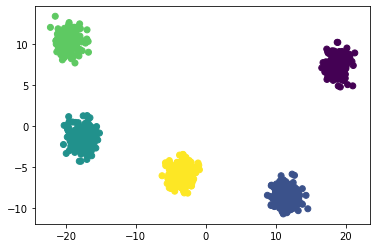

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

In [30]:
from sklearn.cluster import KMeans

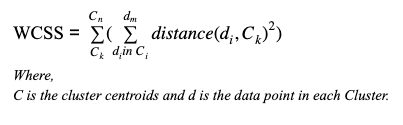

In [31]:
WCSS = []
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(X)
    WCSS.append(model.inertia_) 
    

In [32]:
WCSS

[290884.1622441074,
 92338.75051555697,
 39402.97865000616,
 16476.24739333345,
 2005.8600428432246,
 1845.6241727786955,
 1693.0975009998128,
 1572.4767430406678,
 1423.4769557509196,
 1331.1813332253705,
 1209.7698936330644,
 1121.120233426127,
 1050.674033219233,
 956.1750178532133]

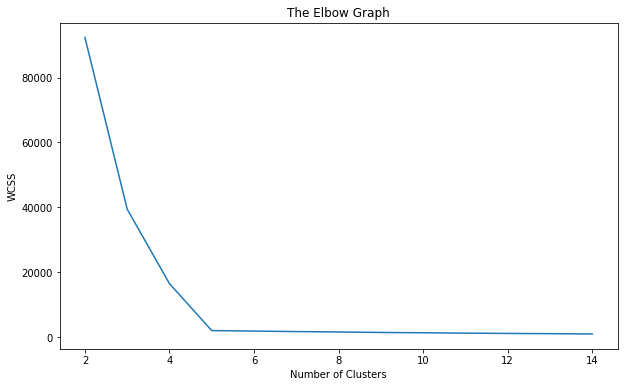

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15), WCSS[1:])
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

* As you can see, elbow point is at 5 cluster number. 
* That means, this dataset should have 5 clusters.
* So k=5 is good number to use in Kmeans clusgtering

In [35]:
cluster = KMeans(n_clusters=5)
cluster.fit(X)

KMeans(n_clusters=5)

In [36]:
cluster.cluster_centers_  # here are the clustur's centers

array([[ 18.7611293 ,   7.35131766],
       [ -3.49728849,  -5.95399842],
       [-17.76137856,  -1.5176106 ],
       [ 11.41865328,  -8.55822459],
       [-19.6303614 ,  10.36560347]])

In [37]:
cluster.inertia_

2005.8600428432248

In [38]:
cluster.labels_  # 5 different clusters

array([1, 0, 4, 4, 1, 4, 2, 4, 4, 4, 0, 2, 2, 3, 0, 1, 1, 4, 3, 0, 2, 2,
       0, 0, 3, 1, 3, 3, 2, 0, 4, 3, 1, 0, 3, 0, 4, 4, 0, 1, 1, 4, 1, 4,
       0, 1, 2, 0, 1, 1, 4, 0, 2, 2, 4, 0, 4, 2, 1, 2, 1, 4, 3, 4, 1, 4,
       2, 1, 3, 1, 2, 3, 2, 1, 2, 3, 0, 2, 1, 4, 2, 0, 0, 0, 0, 3, 3, 2,
       2, 2, 3, 3, 2, 4, 1, 2, 1, 1, 0, 3, 2, 4, 4, 0, 3, 4, 2, 0, 3, 2,
       2, 1, 3, 3, 4, 4, 2, 0, 3, 0, 3, 0, 1, 3, 3, 0, 4, 0, 1, 2, 3, 0,
       3, 3, 0, 1, 2, 4, 4, 1, 2, 4, 0, 3, 4, 3, 1, 1, 0, 2, 2, 1, 2, 0,
       4, 3, 3, 4, 0, 2, 0, 1, 3, 2, 2, 0, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1,
       1, 3, 0, 4, 1, 1, 0, 4, 4, 0, 0, 3, 3, 1, 0, 4, 3, 2, 3, 3, 4, 2,
       1, 1, 4, 3, 0, 2, 3, 0, 3, 2, 2, 1, 4, 4, 2, 0, 4, 2, 0, 4, 3, 4,
       1, 4, 0, 1, 0, 3, 1, 3, 1, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2, 0, 3, 2,
       0, 2, 3, 3, 3, 4, 1, 4, 2, 0, 0, 1, 0, 0, 1, 1, 4, 0, 1, 4, 0, 4,
       4, 3, 4, 2, 3, 3, 3, 1, 1, 4, 2, 3, 4, 1, 4, 0, 1, 1, 3, 2, 1, 3,
       2, 4, 3, 1, 4, 3, 2, 1, 3, 4, 3, 2, 2, 2, 2,

In [68]:
import scipy.stats as scs

In [69]:
d1 = scs.norm([0, 0], [5, 5])

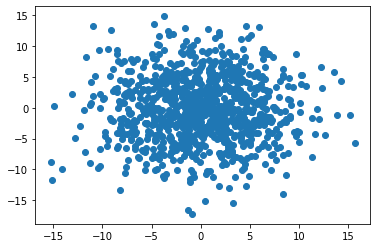

In [79]:
k1 = d1.rvs((1000,2))
plt.scatter(*d1.rvs((1000,2)).T)

In [74]:
d2 = scs.norm([15,-10], [1, 1])

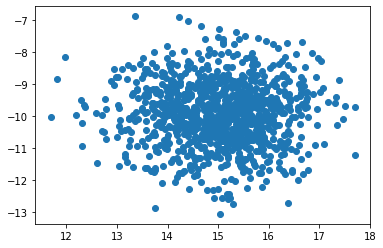

In [76]:
k2 = d2.rvs((1000,2))
plt.scatter(*d2.rvs((1000,2)).T)

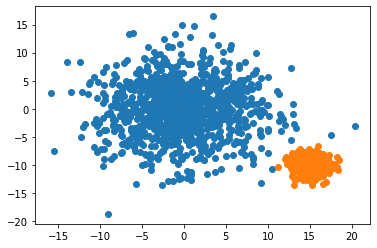

In [77]:
plt.scatter(*d1.rvs((1000,2)).T)
plt.scatter(*d2.rvs((1000,2)).T)

In [80]:
data = np.concatenate([k1, k2], axis=0)
data

array([[ -7.0499241 ,   3.05687296],
       [ -4.31932636,  -3.40596027],
       [ -0.86142943,   0.44489503],
       ...,
       [ 13.98570315, -10.43257408],
       [ 15.29297537,  -9.9599708 ],
       [ 14.5500259 , -10.45270983]])

In [81]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

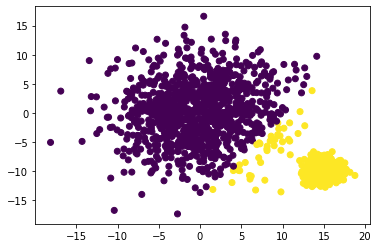

In [82]:
plt.scatter(*data.T, c=kmeans.predict(data))

In [83]:
# kümelerin eşit std sapmaya sahip olduğunu varsayıyor. 

In [88]:
data1, y = datasets.make_moons(n_samples=1000, noise=0.1)

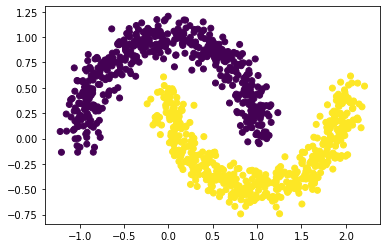

In [89]:
plt.scatter(*data1.T, c=y)

In [90]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)

KMeans(n_clusters=2)

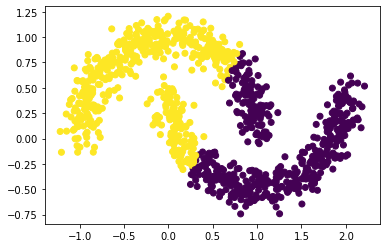

In [91]:
plt.scatter(*data1.T, c=kmeans.predict(data1))

In [92]:
# yine aynı varsayımda bulundu. std sapmaları eşit kabul etti. Bu durumlarda Kmeans başarısız oluyor.

In [93]:
WCSS = []
for k in range(1,15):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(data1)
    WCSS.append(model.inertia_) 

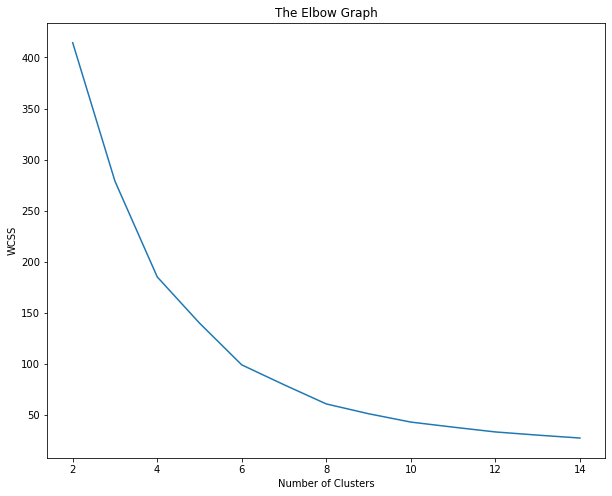

In [94]:
plt.figure(figsize=(10,8))
plt.plot(range(2,15), WCSS[1:])
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()